# What we do here

Here we test the base MatchConfFile object. It teachs you how to create a new conf file and run match from scratch. It also create and add ties and finally show how to optimize a parameter.

In [15]:
from __future__ import print_function, division

import Match
import os
import sys

from matplotlib import pyplot as plt
%matplotlib inline

## Create from Scratch

In [16]:
if sys.version_info.major > 2:
    from importlib import reload

_ = reload(Match)

## Set Series

In [3]:
if os.path.isfile("test.conf"): os.unlink("test.conf")

mcf = Match.MatchConfFile("test.conf")

_ = mcf.setSeries(1, "LR04core")
_ = mcf.setSeries(2, "LR04core")

## Test set parameters

In [4]:
mcf.generateSpeeds(1, 5)

mcf.nomatch = 1.0
mcf.speedpenalty = 1.0
mcf.targetspeed = "1:1"
mcf.speedchange = 1.0
mcf.tiepenalty = 1.0
mcf.gappenalty = 1.0


 ** Series **
      Series: LR04core
              begin: 1000.0 end: 3000.0 num. Intervals: 121  len: 851

      Series: LR04core
              begin: 1000.0 end: 3000.0 num. Intervals: 121  len: 851

 ** Penalties **
     nomatch: 1.0
speedpenalty: 1.0
 targetspeed: 1:1
 speedchange: 1.0
  tiepenalty: 1.0
  gappenalty: 1.0

      speeds: 5:1,4:1,3:1,2:1,1:1,1:2,1:3,1:4,1:5

 ** Constrains & Files **
 series1gaps: None
 series2gaps: None
     tiefile: None
   matchfile: test.match
     logfile: test.log


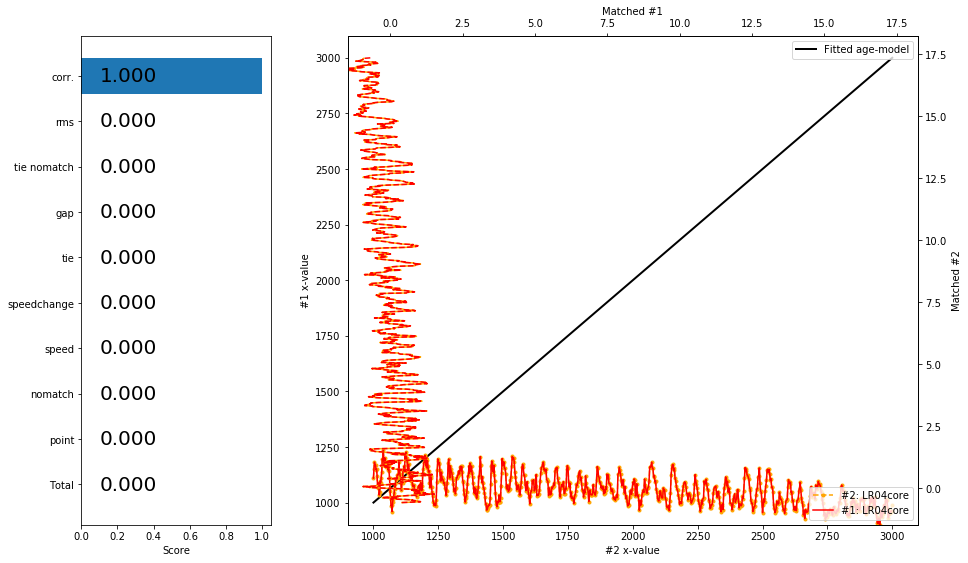

In [5]:
mcf.save()

mcf.report()
_ = mcf.run()

## Add a tie point

In [9]:
tfile = Match.Tie("new_tie")
tfile.set_tie(1500, 1400, label="A", segment_one=0, segment_two=0)
tfile.set_tie(1700, 1600, label="B", segment_one=0, segment_two=0)
tfile.report()
tfile.save()

Total of 2 labels are defined.
  A => 0,1500.000000 = 0,1400.000000
  B => 0,1700.000000 = 0,1600.000000


True


 ** Series **
      Series: LR04core
              begin: 1000.0 end: 3000.0 num. Intervals: 121  len: 851

      Series: LR04core
              begin: 1000.0 end: 3000.0 num. Intervals: 121  len: 851

 ** Penalties **
     nomatch: 5.2
speedpenalty: 0.24
 targetspeed: 1:1
 speedchange: 0.18
  tiepenalty: 1.0
  gappenalty: 0.0

      speeds: 5:1,4:1,3:1,2:1,1:1,1:2,1:3,1:4,1:5

 ** Constrains & Files **
 series1gaps: None
 series2gaps: None
     tiefile: new_tie
   matchfile: lala.match
     logfile: lala.log

 ** Tie is Defined **
Total of 2 labels are defined.
  A => 0,1500.000000 = 0,1400.000000
  B => 0,1700.000000 = 0,1600.000000



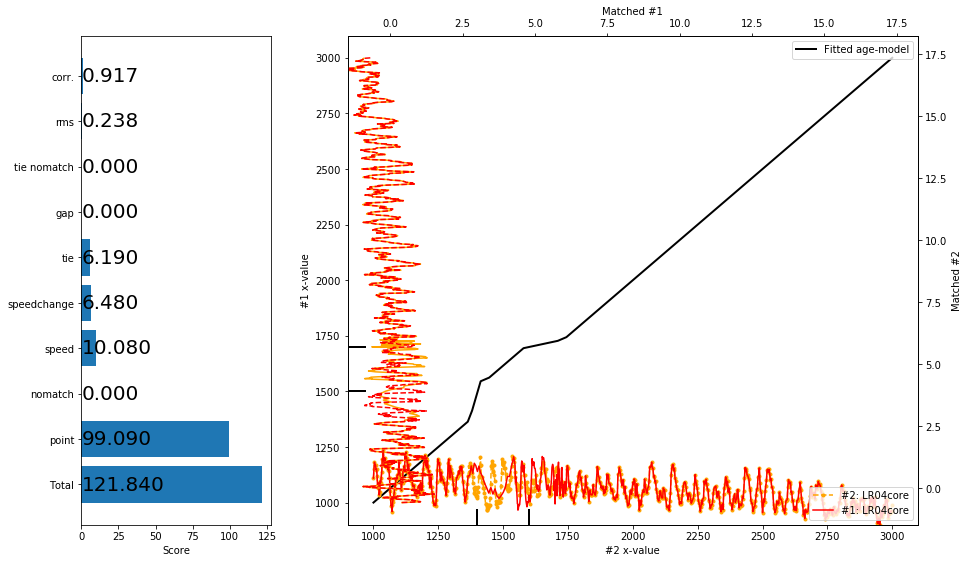

In [10]:
# Set the Tie File
mcf.tiefile = "new_tie"
mcf.guessParameters()
mcf.report()

# Save & Run
mcf.save()
mcf.run()

## Read the written conf file

Working on optimizing speedchange from 0.0 - 10.0
...100 %
Final parameter speedchange = 0.0
Auto-saving file 'lala.conf'


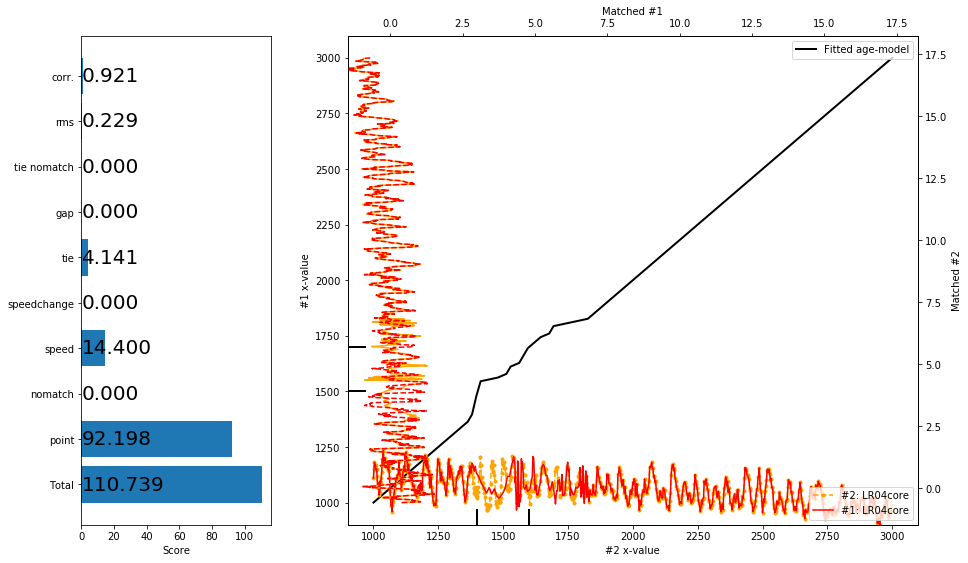

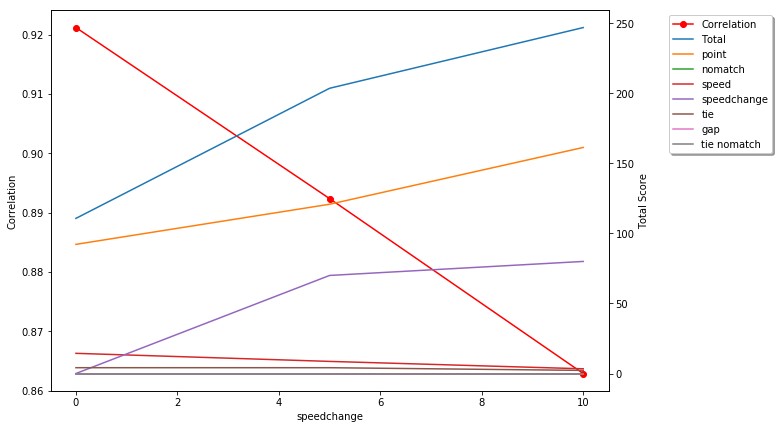

In [11]:
_ = mcf.optimize("speedchange", [0.0, 5.0, 10.])

In [ ]:
plt.figure(figsize=(20,10))
mcf.getSeries(1).plotcomp(mcf.getSeries(2))

In [ ]:
mcf.clean()

## Clean Up

In [ ]:
os.unlink("test.conf")
os.unlink("new_tie")